# **Final Project Data Analysis Python**

This project is about downloading data from the web, creating a corpus and performing sentiment analysis on the data. As a result we get a corpus of horoscopes in Russian with sentiment information.

Parsing data from the web, operations with dataframe and csv formats, sentiment analysis, tokenization, lemmatization and visualization were used in the course of working on the project.

**Downloading and installing useful python packages**

In [ ]:
!pip install pymorphy2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 2.1 MB/s 
     |████████████████████████████████| 8.2 MB 11.8 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=4d6598166d51e4c2f5789cf139c65d55cd9805be2dd81f99069c94410d2d1c93
  Stored in directory: /root/.cache/pip/wheels/56/ea/58/ead137b087d9e326852a851351d1debf4ada529b6ac0ec4e8c
Successfully built docopt


In [ ]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd
import pymorphy2
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Creating corpus**

https://horoscopes.rambler.ru website was chosen as a data source for this project. On this website one can navigate to any date in the past few years and read a horoscope for every sign. Horoscopes are convinient for our purposes because of their relatively short and consistent length.

A period of one year was chosen (2021), every horoscope for all signs and dates were downloaded and saved in the corpus. Final corpus consists of three columns: `sign`, `date` and `prediction` text.

In [ ]:
signs = ['aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra', 'scorpio', 'sagittarius', 'capricorn', 'aquarius', 'pisces']
year = '2021'

In [ ]:
horoscope_file = open('horoscopes.csv', 'w')
writer = csv.writer(horoscope_file)
header = ['sign', 'date', 'prediction']
writer.writerow(header)

for sign in signs:
  for month in range(1, 13):
    for day in range(1, 32):
      r = requests.get('https://horoscopes.rambler.ru/{}/{}-{:02}-{:02}/'.format(sign, year, month, day))

      if r.status_code != 200:
        print('https://horoscopes.rambler.ru/{}/{}-{:02}-{:02}/'.format(sign, year, month, day))
        print('Такой даты нет!')
        continue

      soup = BeautifulSoup(r.content, features='html.parser')
      content = soup.findAll('div', {'class':'_1E4Zo _3BLIa', 'itemprop': "articleBody"})
      for all in content:
        pred = all.findAll('p', {'class':'mtZOt'})

      text = '' 
      for i in pred:
        text += i.text
         
      date = '{}-{:02}-{:02}'.format(year, month, day)
      writer.writerow([sign, date, text])


horoscope_file.close()

https://horoscopes.rambler.ru/aries/2021-02-29/
Такой даты нет!
https://horoscopes.rambler.ru/aries/2021-02-30/
Такой даты нет!
https://horoscopes.rambler.ru/aries/2021-02-31/
Такой даты нет!
https://horoscopes.rambler.ru/aries/2021-04-31/
Такой даты нет!
https://horoscopes.rambler.ru/aries/2021-06-31/
Такой даты нет!
https://horoscopes.rambler.ru/aries/2021-09-31/
Такой даты нет!
https://horoscopes.rambler.ru/aries/2021-11-31/
Такой даты нет!
https://horoscopes.rambler.ru/taurus/2021-02-29/
Такой даты нет!
https://horoscopes.rambler.ru/taurus/2021-02-30/
Такой даты нет!
https://horoscopes.rambler.ru/taurus/2021-02-31/
Такой даты нет!
https://horoscopes.rambler.ru/taurus/2021-04-31/
Такой даты нет!
https://horoscopes.rambler.ru/taurus/2021-06-31/
Такой даты нет!
https://horoscopes.rambler.ru/taurus/2021-09-31/
Такой даты нет!
https://horoscopes.rambler.ru/taurus/2021-11-31/
Такой даты нет!
https://horoscopes.rambler.ru/gemini/2021-02-29/
Такой даты нет!
https://horoscopes.rambler.ru/ge

The corpus was saved to the `horoscopes.cvs` file for the latter convinient use, as the process of parsing takes quite a while. Then we can open it as a dataframe.

In [ ]:
df = pd.read_csv('horoscopes.csv')
df

,sign,date,prediction
0,aries,2021-01-01,"Вы уверенно ступили в новый 2021 год, и стоит ..."
1,aries,2021-01-02,Ваш дом – ваша крепость. Сегодня вам не захоче...
2,aries,2021-01-03,"Новы год – не только веселый праздник, но и до..."
3,aries,2021-01-04,Энергия разрывает вас на части и толкает на ин...
4,aries,2021-01-05,"Сегодня Овны окунутся в мир романтики, загадок..."
...,...,...,...
4375,pisces,2021-12-27,"Деньги любят счет, поэтому сегодня нужно посчи..."
4376,pisces,2021-12-28,"Сегодня вы сияете, и все клюют на вашу харизму..."
4377,pisces,2021-12-29,Будьте уверены в себе – сейчас это привлечет к...
4378,pisces,2021-12-30,"Не нервничайте и не злитесь, если какие-то пла..."


**Sentiment analysis**

For the sentiment analysis was used a dictionary of sentiment words (https://linis-crowd.org/). It is saved in `words_all_full_rating.csv` file.

In this dictionary every word gets a label with an integer within the {-2, 2} interval, with -2 labeling a word with negative connotations and 2 labeling positive. 

In [ ]:
sentiment = pd.read_csv('words_all_full_rating.csv', encoding='Windows-1251', sep=';')
sentiment

,Words,mean,dispersion,average_rate
0,аборигенный,"-0,25","0,433012702",0
1,аборт,-1,"0,816496581",-1
2,абрамович,0,0,0
3,абсолютный,"0,333333333","0,471404521",0
4,абстрактный,"-0,111111111","0,874889764",0
...,...,...,...,...
7540,ярый,"-0,333333333","0,942809042",0
7541,ясно,0,0,0
7542,ясность,"0,666666667","0,471404521",1
7543,ясный,"0,666666667","0,471404521",1


This dictionary needed a preprocessing: irrelevant columns and rows with rate of 0 (they don't affect the ultimate score) were dropped.

In [ ]:
sentiment.drop(['mean', 'dispersion'], axis=1, inplace=True)
sentiment

,Words,average_rate
0,аборигенный,0
1,аборт,-1
2,абрамович,0
3,абсолютный,0
4,абстрактный,0
...,...,...
7540,ярый,0
7541,ясно,0
7542,ясность,1
7543,ясный,1


In [ ]:
sentiment = sentiment[sentiment['average_rate'] != 0]
sentiment

,Words,average_rate
1,аборт,-1
5,абсурд,-1
6,абсурдно,-1
7,абсурдный,-1
12,аварийный,-1
...,...,...
7535,яркий,1
7538,яростный,-1
7539,ярость,-2
7542,ясность,1


To count a sentiment score for every horoscope tokenization and lemmatization had to be performed first to be able to compare words in the corpus with those in the dictionary. Then sentiment scores for every word in the prediction were added together to count total sentiment score for the whole prediction.

In [ ]:
def tokenize(text):
    return [([word.lower() for word in word_tokenize(text) if word.isalpha()])]

def lemmatize(texts):
    morph = pymorphy2.MorphAnalyzer()
    return [([morph.parse(word)[0].normal_form for word in text if word.isalpha()]) for text in texts]

def count_sentiment_score(prediction):
    score = 0
    prediction = tokenize(prediction)
    prediction = lemmatize(prediction)
    for word in prediction[0]:
      if word in sentiment['Words'].values:
        score += sentiment.loc[sentiment.Words == word, 'average_rate'].values[0]
    return score

df['sentiment'] = df['prediction'].apply(count_sentiment_score)

In [ ]:
df 

,sign,date,prediction,sentiment
0,aries,2021-01-01,"Вы уверенно ступили в новый 2021 год, и стоит ...",2
1,aries,2021-01-02,Ваш дом – ваша крепость. Сегодня вам не захоче...,1
2,aries,2021-01-03,"Новы год – не только веселый праздник, но и до...",0
3,aries,2021-01-04,Энергия разрывает вас на части и толкает на ин...,1
4,aries,2021-01-05,"Сегодня Овны окунутся в мир романтики, загадок...",2
...,...,...,...,...
4375,pisces,2021-12-27,"Деньги любят счет, поэтому сегодня нужно посчи...",5
4376,pisces,2021-12-28,"Сегодня вы сияете, и все клюют на вашу харизму...",3
4377,pisces,2021-12-29,Будьте уверены в себе – сейчас это привлечет к...,2
4378,pisces,2021-12-30,"Не нервничайте и не злитесь, если какие-то пла...",0


In [ ]:
df.to_csv('horoscopes_sentiment.csv', index=False)

This dataframe was saved, too, as lemmatization is not the fastest process.

In [ ]:
df = pd.read_csv('horoscopes_sentiment.csv')
df

,sign,date,prediction,sentiment
0,aries,2021-01-01,"Вы уверенно ступили в новый 2021 год, и стоит ...",2
1,aries,2021-01-02,Ваш дом – ваша крепость. Сегодня вам не захоче...,1
2,aries,2021-01-03,"Новы год – не только веселый праздник, но и до...",0
3,aries,2021-01-04,Энергия разрывает вас на части и толкает на ин...,1
4,aries,2021-01-05,"Сегодня Овны окунутся в мир романтики, загадок...",2
...,...,...,...,...
4375,pisces,2021-12-27,"Деньги любят счет, поэтому сегодня нужно посчи...",5
4376,pisces,2021-12-28,"Сегодня вы сияете, и все клюют на вашу харизму...",3
4377,pisces,2021-12-29,Будьте уверены в себе – сейчас это привлечет к...,2
4378,pisces,2021-12-30,"Не нервничайте и не злитесь, если какие-то пла...",0


**Plots**

On this plot we see how sentiment value is distributed. We can also notice that it is close to the Gauss distribution, which is what one should expect.

One can also note that the are noticeably more positive predictions which is quite natural for the horoscopes.

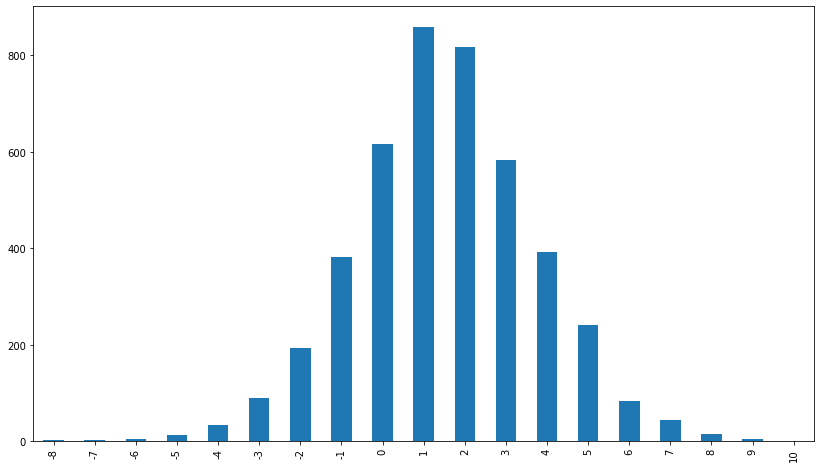

In [ ]:
ax = df['sentiment'].value_counts().sort_index().plot(kind='bar', figsize=(14,8))

Let's look at the endpoints of the plot above.

In [ ]:
df_sorted = df.sort_values(by=['sentiment'], ascending=False)

Here we see that most of the predictions with highest sentiment scores are really optimistic. At the same time the prediction with the highest value is quite negative. That proves this simplest dictionary-based sentiment analysis method being not quite reliable.

In [ ]:
df_sorted.head(10)

,sign,date,prediction,sentiment
615,taurus,2021-09-08,"Сегодня вы встанете не с той ноги, поэтому и н...",10
238,aries,2021-08-27,Со всех сторон отличный день – можно и деньги ...,9
3346,capricorn,2021-03-03,"Звезды «за» долгие диалоги, деловое или дружес...",9
3643,capricorn,2021-12-25,Ждите от этого дня яркие впечатления и приятны...,9
2802,scorpio,2021-09-05,Сегодня окружающие (в числе которых будут очен...,9
248,aries,2021-09-06,Лунный месяц заканчивается и самое время взять...,9
247,aries,2021-09-05,Вам сегодня крупно везет – звезды посылают отл...,8
1355,cancer,2021-09-18,"Откажитесь от всего нового, реже встречайтесь ...",8
600,taurus,2021-08-24,Встать с кровати этим утром – невыполнимая мис...,8
83,aries,2021-03-25,Пора творить – сегодня самое благоприятное вре...,8


In [ ]:
df_sorted.tail(10)

,sign,date,prediction,sentiment
1647,leo,2021-07-07,Сегодня придется сражаться с проблемами и непр...,-6
245,aries,2021-09-03,Сегодня у вас есть шикарная возможность решить...,-6
672,taurus,2021-11-04,"Тучи сгущаются над вашей головой, и проблемы м...",-6
3345,capricorn,2021-03-02,Сегодня Козерогам стоит остерегаться любого не...,-6
540,taurus,2021-06-25,Что-то неприятное ударит вас сегодня в самое с...,-6
145,aries,2021-05-26,В этот день затмения очень важно не втягиватьс...,-7
2079,virgo,2021-09-12,"Возможности смотрят на вас со всех сторон, но ...",-7
2932,sagittarius,2021-01-13,Чем выше вы карабкаетесь по карьерной лестнице...,-7
4262,pisces,2021-09-05,Боевое настроение сегодня поможет вам дотянуть...,-8
2799,scorpio,2021-09-02,Сегодня каждый норовит поделиться с вами грязн...,-8


At the end the average sentiment score is counted. As was mentioned above, the average value is positive which comes from the very nature of the horoscope: astrologists tend to promise good things that will make people more optimistic.

Apparenty, cancer sign should have had the luckiest year of all.

In [ ]:
df_grouped = df.groupby(['sign']).agg({'sentiment': 'mean'})
df_grouped

,sentiment
sign,
aquarius,1.441096
aries,1.452055
cancer,1.663014
capricorn,1.646575
gemini,1.569863
leo,1.542466
libra,1.463014
pisces,1.509589
sagittarius,1.380822


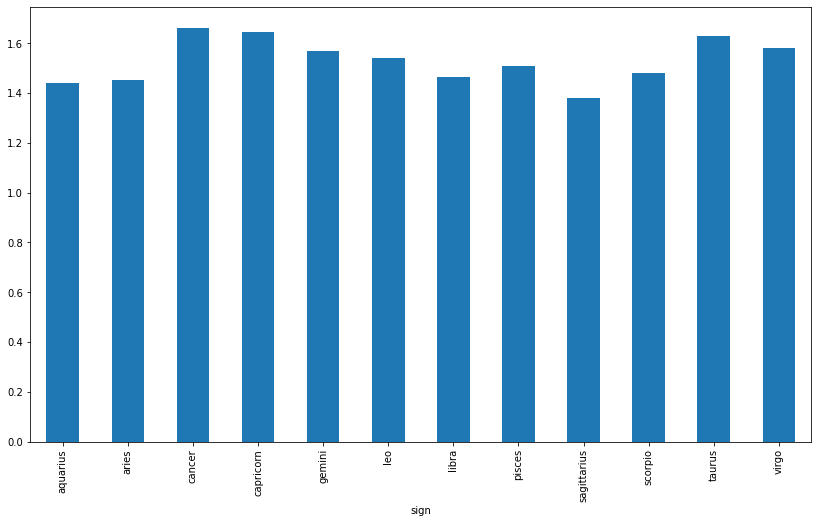

In [ ]:
ax2 = df_grouped['sentiment'].plot(kind='bar', figsize=(14,8))